In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [18]:
h = unp.uarray([920, 930, 938.3, 943.1], 0.1)  # mm
t = unp.uarray([391.62, 279.85, 188.29, 126.91], 1)  # s
# N = unp.uarray([10006, 10010, 10002, 10015], 200)  # compte neutrons dans l'intervalle
N = np.array([10006, 10010, 10002, 10015])  # compte neutrons dans l'intervalle

C = N/t  # comptage
Cinv = 1/C

print(Cinv)

[0.03913851688986608+/-9.994003597841295e-05
 0.027957042957042957+/-9.99000999000999e-05
 0.018825234953009397+/-9.998000399920016e-05
 0.012671992011982028+/-9.98502246630055e-05]


# Graphique

955.0030032936677 954.4762095914302 955.548969830655 0.5267937022374554 0.5459665369872937


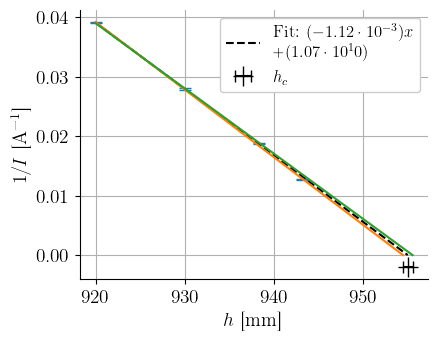

955.4104615910624 954.9550375751048 955.886268709223 0.4554240159575329 0.4758071181606738


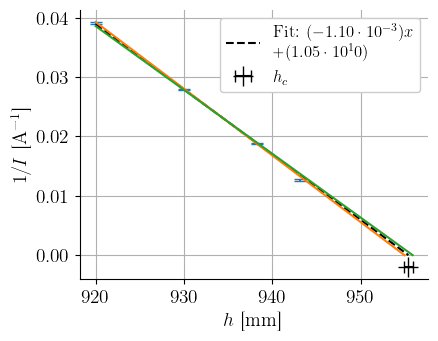

952.9851227296672 952.5987542197754 953.3974286678574 0.3863685098917813 0.4123059381902294


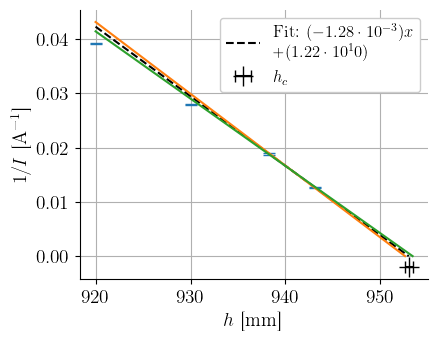

In [19]:
hc_est = np.zeros((len(h)-1, 3))
for i in range(len(h) - 1):  # basically pairwise
    coefs1 = np.polyfit(nom_vals(h[i:i+2]), nom_vals(Cinv[i:i+2]), 1)
    hc_avg = -coefs1[1]/coefs1[0]

    coefs2 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n + Cinv[i].s, Cinv[i+1].n - Cinv[i+1].s], 1)
    hc_low = -coefs2[1]/coefs2[0]

    coefs3 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n - Cinv[i].s, Cinv[i+1].n + Cinv[i+1].s], 1)
    hc_high = -coefs3[1]/coefs3[0]

    print(hc_avg, hc_low, hc_high, abs(hc_avg - hc_low), abs(hc_avg - hc_high))
    hc_est[i] = (hc_avg, hc_low, hc_high)

    # fuck it show it all
    plt.errorbar(nom_vals(h), nom_vals(Cinv), yerr=std_devs(Cinv), linestyle='none')

    x_avg = np.linspace(920, hc_avg)
    plt.plot(x_avg, np.poly1d(coefs1)(x_avg), '--', color='k', label=f"Fit: $({coefs1[0]*1e3:.2f} \\cdot 10^{{-3}}) x$\n$+ ({coefs1[1]:.2f} \\cdot 10^{10})$")
    x_low = np.linspace(920, hc_low)
    plt.plot(x_low, np.poly1d(coefs2)(x_low))
    x_high = np.linspace(920, hc_high)
    plt.plot(x_high, np.poly1d(coefs3)(x_high))
    
    plt.errorbar([hc_avg], [-2e-3], xerr=[[hc_avg-hc_low], [hc_high-hc_avg]], color='k', fmt='+', label='$h_c$')

    plt.xlabel(r'$h$ [mm]')
    plt.ylabel(r'$1/I$ [\si{\per\ampere}]')
    plt.legend()
    plt.grid()

    # plt.savefig(f'../figures/h_I_pair{i+1}{i+2}.pdf')
    plt.show()

# trouvé: hc = 952.2
# aussi retrouvé nice

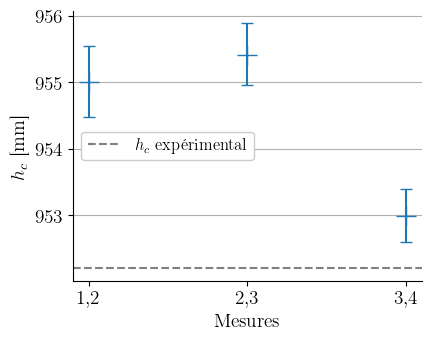

In [20]:
plt.errorbar(['1,2', '2,3', '3,4'], hc_est[:,0], yerr=np.abs(hc_est[:,1:].T - hc_est[:,0]), fmt='+')
plt.axhline(952.2, linestyle='--', label='$h_c$ expérimental')

plt.xlabel(r'Mesures')
plt.ylabel(r'$h_c$ [mm]')
plt.legend()
plt.grid(axis='y')
# plt.savefig('../figures/hc_results_I.pdf')

In [21]:
', '.join(map(str, unp.uarray(hc_est[:,0], np.max(np.abs(hc_est[:,1:].T - hc_est[:,0]), axis=0))))

'955.0+/-0.5, 955.4+/-0.5, 953.0+/-0.4'

# Monte Carlo

In [ ]:
hc_est = np.zeros((len(h)-1, 3))
for i in range(len(h) - 1):  # basically pairwise
    coefs1 = np.polyfit(nom_vals(h[i:i+2]), nom_vals(Cinv[i:i+2]), 1)
    hc_avg = -coefs1[1]/coefs1[0]

    coefs2 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n + Cinv[i].s, Cinv[i+1].n - Cinv[i+1].s], 1)
    hc_low = -coefs2[1]/coefs2[0]

    coefs3 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n - Cinv[i].s, Cinv[i+1].n + Cinv[i+1].s], 1)
    hc_high = -coefs3[1]/coefs3[0]

    print(hc_avg, hc_low, hc_high, abs(hc_avg - hc_low), abs(hc_avg - hc_high))
    hc_est[i] = (hc_avg, hc_low, hc_high)

    # fuck it show it all
    plt.errorbar(nom_vals(h), nom_vals(Cinv), yerr=std_devs(Cinv), linestyle='none')

    x_avg = np.linspace(920, hc_avg)
    plt.plot(x_avg, np.poly1d(coefs1)(x_avg), '--', color='k', label=f"Fit: $({coefs1[0]*1e-7:.2f} \\cdot 10^7) x$\n$+ ({coefs1[1]*1e-10:.2f} \\cdot 10^{10})$")
    x_low = np.linspace(920, hc_low)
    plt.plot(x_low, np.poly1d(coefs2)(x_low))
    x_high = np.linspace(920, hc_high)
    plt.plot(x_high, np.poly1d(coefs3)(x_high))
    
    plt.errorbar([hc_avg], [-1e-3], xerr=[[hc_avg-hc_low], [hc_high-hc_avg]], color='k', fmt='+', label='$h_c$')

    plt.xlabel(r'$h$ [mm]')
    plt.ylabel(r'$1/I$ [\si{\per\ampere}]')
    plt.legend()
    plt.grid()

    # plt.savefig(f'../figures/h_I_pair{i+1}{i+2}.pdf')
    plt.show()